In [32]:
#Dependancies
import requests
import pandas as pd
import json
from config import college_scorecard_api_key
import csv
import matplotlib.pyplot as plt
from scipy import stats



In [21]:
# Call in 2017 'College Scorecard (i.e. csc)' API ; only schools that offer a bachelor's or graduate degree
year = "2017"
csc_url = "https://api.data.gov/ed/collegescorecard/v1/schools.json?school.degrees_awarded.highest=3,4&"

csc_2017_query_url = f'{csc_url}api_key={college_scorecard_api_key}&_fields=id,school.name,school.city,school.state_fips,school.zip,location.lat,location.lon,{year}'
csc_2017_response = requests.get(csc_2017_query_url).json()

# Identify JSON page number
page_num = csc_2017_response['metadata']['page']
csc_json_data = []

# Loop through each JSON page and extract JSON data into a list
for page in range(0, 29):
    csc_2017_response = requests.get(csc_2017_query_url, params={'page': page, 'per_page': 100}).json()
    csc_json_data.append(csc_2017_response['results'])
    csc_data_list = []
    for csc_data in csc_json_data:
        for csc_objects in csc_data:
            csc_data_list.append(csc_objects)

# Convert JSON list into a Dataframe
csc_data_frame = pd.DataFrame(csc_data_list)

In [22]:
# Pull columns needed
csc_data_table_pull = csc_data_frame[['school.name',
                                     'school.city',
                                     'school.state_fips',
                                     'location.lat',
                                     'location.lon',
                                     '2017.student.size',
                                     '2017.cost.attendance.academic_year',
                                     '2017.cost.tuition.in_state',
                                     '2017.cost.tuition.out_of_state',
                                     '2017.student.retention_rate.four_year.full_time',
                                     '2017.aid.federal_loan_rate',
                                     '2017.aid.loan_principal',
                                     '2017.aid.median_debt.completers.overall',
                                     '2017.aid.median_debt.income.0_30000',
                                     '2017.aid.median_debt.income.30001_75000',
                                     '2017.aid.median_debt.income.greater_than_75000',
                                     '2017.aid.median_debt.female_students',
                                     '2017.aid.median_debt.male_students',
                                     '2017.completion.rate_suppressed.overall']].dropna().reset_index(drop=True)

# Clean column headers
csc_data_table_header_clean = csc_data_table_pull.rename(columns = {'school.name': 'School Name',
                                                              'school.city': 'City',
                                                              'school.state_fips': 'State Code',
                                                              'location.lat': 'Latitude',
                                                              'location.lon': 'Longitude',
                                                              '2017.student.size': 'Student Size',
                                                              '2017.cost.attendance.academic_year': 'Cost of Attendance',
                                                              '2017.cost.tuition.in_state': 'In-State Tuition',
                                                              '2017.cost.tuition.out_of_state': 'Out-of-State Tuition',
                                                              '2017.student.retention_rate.four_year.full_time': 'Retention Rate: Fulltime Student',
                                                              '2017.aid.federal_loan_rate': '% of Undergrad Students Recieving Fed Student Loan',
                                                              '2017.aid.loan_principal': 'Median Loan Principal',
                                                              '2017.aid.median_debt.completers.overall': 'Median Debt',
                                                              '2017.aid.median_debt.income.0_30000': 'Median Debt with income between 0-30k',
                                                              '2017.aid.median_debt.income.30001_75000': 'Median Debt with income between 30,001-75k',
                                                              '2017.aid.median_debt.income.greater_than_75000': 'Median Debt with income greater than 75k',
                                                              '2017.aid.median_debt.female_students': 'Median Debt for Female Students',
                                                              '2017.aid.median_debt.male_students': 'Median Debt for Male Students',
                                                              '2017.completion.rate_suppressed.overall': 'Completion Rate'})


In [60]:
# Pull in and merge State names.

fips_path = "Resources/State FIPS Codes.csv"
fips_states_df = pd.read_csv(fips_path)

csc_data_final = pd.merge(csc_data_table_header_clean, fips_states_df, on='State Code')
csc_data_final.head()

,School Name,City,State Code,Latitude,Longitude,Student Size,Cost of Attendance,In-State Tuition,Out-of-State Tuition,Retention Rate: Fulltime Student,...,Median Loan Principal,Median Debt,Median Debt with income between 0-30k,"Median Debt with income between 30,001-75k",Median Debt with income greater than 75k,Median Debt for Female Students,Median Debt for Male Students,Completion Rate,State Name,State Abbrev
0,Bloomfield College,Bloomfield,34,40.795105,-74.194309,1833.0,42994.0,29300.0,29300.0,0.6282,...,17500.0,29375.0,18500.0,18113.0,15000.0,18500.0,16219.0,0.3155,New Jersey,NJ
1,Eastern International College-Belleville,Belleville,34,40.789635,-74.152439,244.0,24903.0,21225.0,21225.0,0.8065,...,13925.0,24755.0,10539.0,18025.0,15750.0,13175.0,15800.0,0.8467,New Jersey,NJ
2,Pillar College,Newark,34,40.738539,-74.169153,427.0,37257.0,21076.0,21076.0,0.7083,...,15375.0,23343.0,14363.0,20030.0,13875.0,15250.0,15077.0,0.1579,New Jersey,NJ
3,Eastern International College-Jersey City,Jersey City,34,40.735178,-74.060452,230.0,24725.0,21225.0,21225.0,0.7755,...,13925.0,24755.0,10539.0,18025.0,15750.0,13175.0,15800.0,0.8188,New Jersey,NJ
4,University of Phoenix-New Jersey,Jersey City,34,40.726763,-74.033131,111.0,20940.0,9960.0,9960.0,0.2500,...,18500.0,32813.0,16062.0,21593.0,21000.0,18917.0,16962.0,0.1260,New Jersey,NJ


### Henock's Code - Start

### Henock's Code - End

----------------------------------------------

### JJ's Code - Start

### JJ's Code - End

----------------------------------------------

### Ana's Code - Start

In [24]:
plt.close()

## Which is the gender distribution of median Debt comparing with the total median Debt?

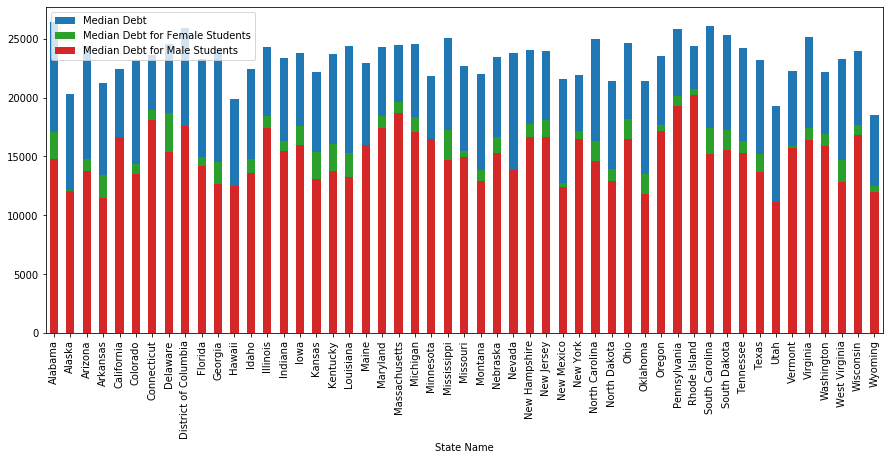

In [25]:
#Read the columns we need for building a plot
csc_data_finaly =pd.DataFrame(csc_data_final.groupby(['State Name'])['Median Debt', 'Median Debt for Female Students', 'Median Debt for Male Students' ].mean())
csc_data_finaly =csc_data_finaly.reset_index()

#plot
ax = csc_data_finaly.plot(x="State Name", y="Median Debt", kind="bar",figsize=(15,6))
csc_data_finaly.plot(x="State Name", y="Median Debt for Female Students", kind="bar", ax=ax, color="C2")
csc_data_finaly.plot(x="State Name", y="Median Debt for Male Students", kind="bar", ax=ax, color="C3")

plt.show()

#### This plot is showing that nationally there are more women with debt than men. Alos we can see the total median Debt by state. 

In [26]:
plt.close()

In [30]:
plt.close()

# What is the T-test for the mean of ONE group for 'Median Debd'?
### The Ho is : The population and the sample of the population have equal avarages of Median Debd

In [27]:

# Generate some data to test with
def gendata(loc=0):
    population = csc_data_final['Median Debt']
    sample = population.sample(frac =.25) 
    
    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="population")
    plt.scatter(range(len(sample)), sample, label="sample")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="population")
    plt.hist(sample, 20, density=True, alpha=0.7, label="sample")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample

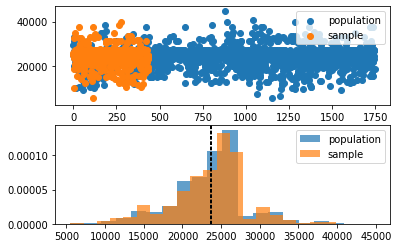

In [28]:
# Generate some data and show the scatter plot
population, sample = gendata()
#plt.show()

In [34]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=-0.32931909448155033, pvalue=0.7420726528405124)

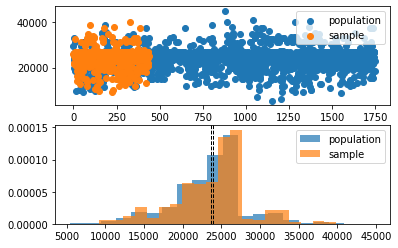

In [42]:
# Generate data with a bigger difference in means
population, sample = gendata(loc=10000)

In [43]:
stats.ttest_1samp(sample, population.mean())

Ttest_1sampResult(statistic=0.9357276426062986, pvalue=0.3499314124323396)

#### This is a two-sided test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean. p_value> 0.05. We fail to reject the null hypothesis.

In [37]:
plt.close()

In [45]:
plt.close()

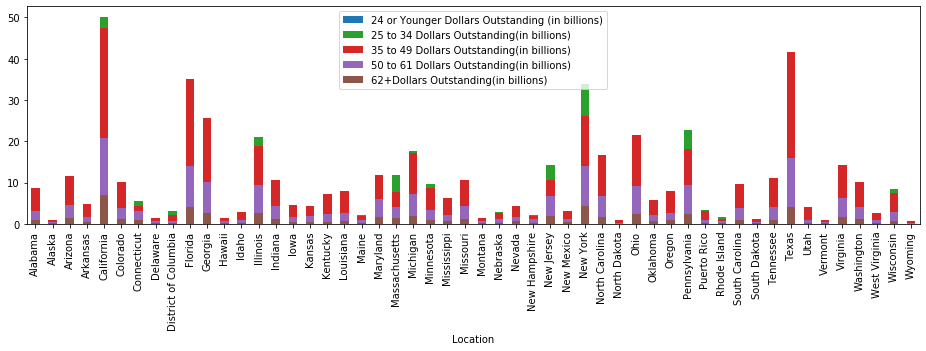

In [44]:
#Portfolio-by-Location-by-Age
data5_df = pd.read_csv("Resources/Portfolio-by-Location-by-Age.csv")
data5_df.rename(columns = {' ' : 'Location',
                              '24 - Younger':'24 or Younger Dollars Outstanding (in billions)',
                              'Unnamed: 2':'24 or Younger Barrowers(#)(in millions)',
                              '25 -34' :'25 to 34 Dollars Outstanding(in billions)',
                              'Unnamed: 4' :'25 to 34 Barrowers(#)(in millions)',
                              '35 - 49' :'35 to 49 Dollars Outstanding(in billions)',
                              'Unnamed: 6' :'35 to 49 Barrowers(#)(in millions)',
                              '50 -61' :'50 to 61 Dollars Outstanding(in billions)',
                              'Unnamed: 8' :'50 to 61 Barrowers(#)(in millions)',
                              '62 - Older' :'62+Dollars Outstanding(in billions)',
                              'Unnamed: 10' :'62+Barrowers(#)(in millions)'
                              }, inplace = True)
data5_df = data5_df.drop(data5_df.index[0])
data5_df = data5_df.drop(data5_df.index[53])
data = list(data5_df.columns.values)
#print(data[1:])
data5_df[data[1:]]
data5_df[data[1:]] = data5_df[data[1:]].replace('[\$,]','', regex=True).astype(float)
data5_df = data5_df.drop(data5_df.index[52])
data5_df.tail()
ax = data5_df.plot(x="Location", y="24 or Younger Dollars Outstanding (in billions)", kind="bar",figsize=(16,4))
data5_df.plot(x="Location", y="25 to 34 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C2")
data5_df.plot(x="Location", y="35 to 49 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C3")
data5_df.plot(x="Location", y="50 to 61 Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C4")
data5_df.plot(x="Location", y="62+Dollars Outstanding(in billions)", kind="bar", ax=ax, color="C5")

plt.show()

In [46]:
plt.close()

In [14]:
plt.close()

In [16]:
data1_df = pd.read_csv("Resources/5StatesData.csv")
data1_df = data1_df.dropna()
data1_df.tail()

,Name,Year,Average debt of graduates,Percent of graduates with debt,Per capita debt of graduates,Average debt of graduates in federal loans,Percent of graduates borrowing federal loans,Per capita federal debt of graduates,"Federal debt of graduates, as percent of total debt",Per capita nonfederal debt of graduates,"Nonfederal debt of graduates, as percent of total debt"
70,Rhode Island - Total,2011-12,30483.0,0.69,21001.0,21383.0,0.67,14334.0,0.68,6667.0,0.32
71,Rhode Island - Total,2010-11,29097.0,0.69,20195.0,20544.0,0.67,13801.0,0.68,6394.0,0.32
72,Rhode Island - Total,2009-10,26340.0,0.67,17587.0,19447.0,0.63,12345.0,0.70,5242.0,0.30
73,Rhode Island - Total,2008-09,26573.0,0.65,17404.0,18437.0,0.63,11655.0,0.67,5749.0,0.33
74,Rhode Island - Total,2007-08,25831.0,0.71,18231.0,18079.0,0.68,12317.0,0.68,5914.0,0.32


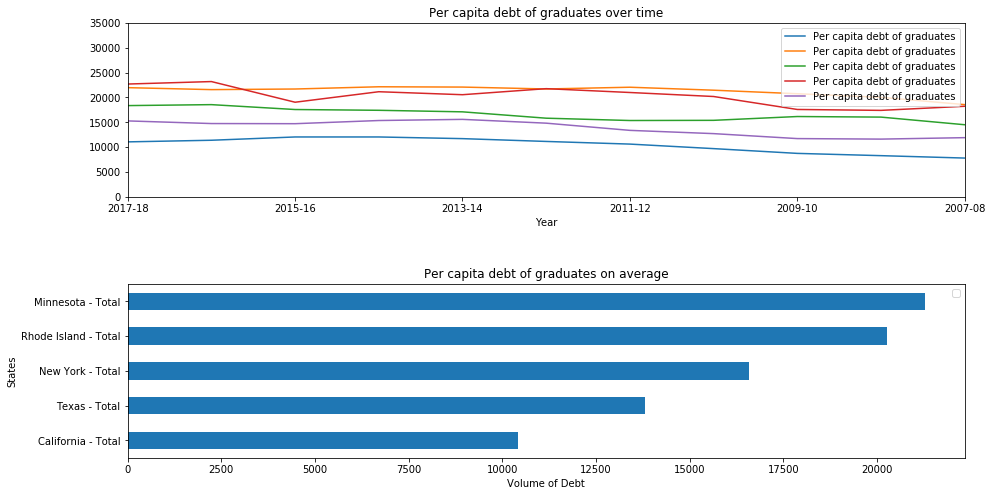

In [20]:
#Per capita debt of graduates over time

fig = plt.figure()

# Divide the figure into a 2x1 grid, and give me the first section
ax1 = fig.add_subplot(211)

# Divide the figure into a 2x1 grid, and give me the second section
ax2 = fig.add_subplot(212)

#Line plot 
data1_df.groupby('Name').plot(x='Year', y='Per capita debt of graduates', ax=ax1, figsize= (15,8))
ax1.set_ylim((0,35000))

####ax1.xaxis.set_ticks([2007-8,2008-9, 2009-10, 2010-11,2011-12, 2012-13,2013-14,2014-15,2015-15,1016-17])
ax1.xaxis.set_label_text("Year")
ax1.set_title("Per capita debt of graduates over time")
plt.legend(['California', 'Florida', 'Massachusetts','Minnesota','Washington'],
           loc='upper right')
####ax1.set_legend((line1, line2, line3,line4), ('Minnesota', 'Massachusetts', 'Washington','Florida','California'))
#Bar Plot
data1_df.groupby('Name')['Per capita debt of graduates'].mean().sort_values().plot(kind='barh', ax=ax2, figsize=(15,8))
ax2.yaxis.set_label_text("States")
ax2.xaxis.set_label_text("Volume of Debt")
ax2.set_title("Per capita debt of graduates on average")
fig.subplots_adjust(hspace=0.5)

In [47]:
plt.close()

0       32163.899433
1       19555.992589
2       28165.692503
3       19431.941546
4       16794.114593
            ...     
1743    34187.046498
1744    45726.581157
1745    37303.654724
1746    21598.653302
1747    15870.700931
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.7x + 2200.69
The correlation between Cost of Attendance and  Out-of-State Tuition is: 0.8978778752901303


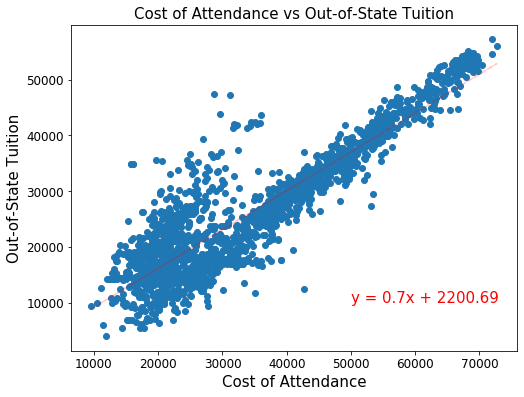

In [50]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Out-of-State Tuition
one_df = csc_data_final['Cost of Attendance']
two_df = csc_data_final['Out-of-State Tuition']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one_df,two_df)
regress_values = one_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one_df, two_df)
plt.plot(one_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Out-of-State Tuition', size=15)
plt.title('Cost of Attendance vs Out-of-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Out-of-State Tuition is: {rvalue}")

plt.show()

0       30122.449345
1       13514.957116
2       24855.897860
3       13351.553566
4        9876.933142
            ...     
1743    32787.396000
1744    47987.598107
1745    36892.680686
1746    16205.607700
1747     8660.586495
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.92x + -9345.93
The correlation between Cost of Attendance and  In-State Tuition is: 0.9816713138974049


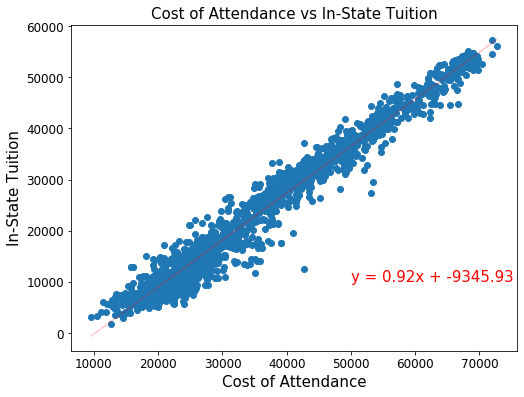

In [54]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and In-State Tuition
one1_df = csc_data_final['Cost of Attendance']
two1_df = csc_data_final['In-State Tuition']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one1_df,two1_df)
regress_values = one1_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one1_df, two1_df)
plt.plot(one1_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('In-State Tuition', size=15)
plt.title('Cost of Attendance vs In-State Tuition', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  In-State Tuition is: {rvalue}")

plt.show()

In [56]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Completion Rate
one2_df = csc_data_final['Cost of Attendance']
two2_df = csc_data_final['Completion Rate']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one2_df,two2_df)
regress_values = one2_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one2_df, two2_df)
plt.plot(one2_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Completion Rate', size=15)
plt.title('Cost of Attendance vs Completion Rate', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and Completion Rate is: {rvalue}")

plt.show()

0       0.581555
1       0.436739
2       0.535631
3       0.435315
4       0.405016
          ...   
1743    0.604793
1744    0.737337
1745    0.640591
1746    0.460202
1747    0.394410
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.0x + 0.24
The correlation between Cost of Attendance and Completion Rate is: 0.6018209600689016


ValueError: Image size of 505x3015541 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 576x432 with 1 Axes>

0       17466.938513
1       14952.280902
2       16669.492782
3       14927.538817
4       14401.422015
            ...     
1743    17870.456895
1744    20172.026777
1745    18492.067024
1746    15359.691297
1747    14217.246384
Name: Cost of Attendance, Length: 1748, dtype: float64
y = 0.14x + 11490.75
The correlation between Cost of Attendance and  Median Debt with income greater than 75k is: 0.4813458287655076


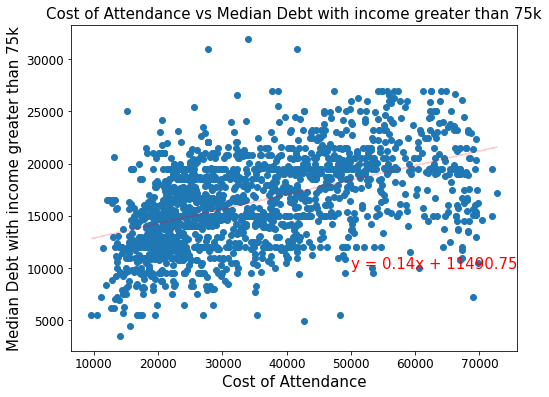

In [59]:
# Calculate the correlation coefficient and linear regression model for Cost of Attendance and Median Debt with income greater than 75k
one3_df = csc_data_final['Cost of Attendance']
two3_df = csc_data_final['Median Debt with income greater than 75k']

(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(one3_df,two3_df)
regress_values = one3_df * slope + intercept
print(regress_values)

# Create line equation 
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

# Plot the linear model with scatter plot
plt.figure(figsize=(8,6))
plt.scatter(one3_df, two3_df)
plt.plot(one3_df, regress_values, 'r--', alpha=0.2)

# Label plot and annotate the line equation
plt.annotate(line_eq,(50000,10000),fontsize=15,color="red")
plt.xlabel('Cost of Attendance', size=15)
plt.ylabel('Median Debt with income greater than 75k', size=15)
plt.title('Cost of Attendance vs Median Debt with income greater than 75k', size=15)
plt.xticks(size=12)
plt.yticks(size=12)
print(f"The correlation between Cost of Attendance and  Median Debt with income greater than 75k is: {rvalue}")

plt.show()

### Ana's Code - End

----------------------------------------------

### Vikash's Code - Start

### Vikash's Code - End